## Udacity Vehicle Detection and Tracking Lesson Material (Part 1):

The following jupyter notebook is created to follow along with the course material provided for P5 project of term 1

---
## Imports:

In [1]:
import cv2
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


---

## Manual Vehicle Detection:

using cv2.rectangle() function to anually locate cars in an image

In [2]:
example_manualdetection = mpimg.imread('./sample_images/bbox-example-image.jpg')

In [3]:
# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    # draw each bounding box on your image copy using cv2.rectangle()
    for box in bboxes:
        cv2.rectangle(draw_img, box[0], box[1], color, thick)
    # return the image copy with boxes drawn
    return draw_img 

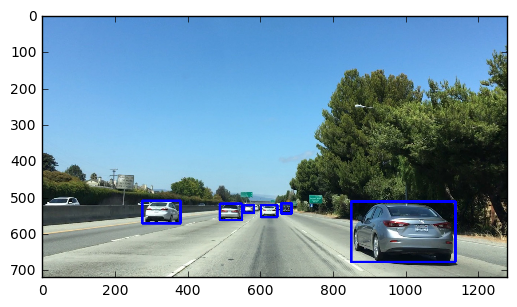

In [4]:
bboxes = [((275, 572), (380, 510)), ((488, 563), (549, 518)), ((554, 543), (582, 522)), 
          ((601, 555), (646, 522)), ((657, 545), (685, 517)), ((849, 678), (1135, 512))]

result = draw_boxes(example_manualdetection, bboxes)
plt.imshow(result)

---

## Feature extraction methods using:

- Raw pixel intensity

- Histogram of pixel intensity

- Gradients of pixel intensity

---

## Raw Pixel Intensity:

Template Matching using cv2.matchTemplate() and cv2.minMaxLoc() functions

In [5]:
# Method used:
# Iterate over the list of templates
# Use cv2.matchTemplate() to search the image for each template
# NOTE: You can use any of the cv2.matchTemplate() search methods
# Use cv2.minMaxLoc() to extract the location of the best match in each case
# Compile a list of bounding box corners as output
# Return the list of bounding boxes

image = mpimg.imread('./sample_images/bbox-example-image.jpg')
#image = mpimg.imread('temp-matching-example-2.jpg')
templist = ['./sample_images/cutout1.jpg', './sample_images/cutout2.jpg', './sample_images/cutout3.jpg',
            './sample_images/cutout4.jpg', './sample_images/cutout5.jpg', './sample_images/cutout6.jpg']

In [6]:
# Define a function to search for template matches
# and return a list of bounding boxes
def find_matches(img, template_list):
    # Define an empty list to take bbox coords
    bbox_list = []
    # Define matching method
    # Other options include: cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCORR',
    #         'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
    method = cv2.TM_CCOEFF_NORMED
    # Iterate through template list
    for temp in template_list:
        # Read in templates one by one
        tmp = mpimg.imread(temp)
        # Use cv2.matchTemplate() to search the image
        result = cv2.matchTemplate(img, tmp, method)
        # Use cv2.minMaxLoc() to extract the location of the best match
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        # Determine a bounding box for the match
        w, h = (tmp.shape[1], tmp.shape[0])
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        # Append bbox position to list
        bbox_list.append((top_left, bottom_right))
        # Return the list of bounding boxes
        
    return bbox_list

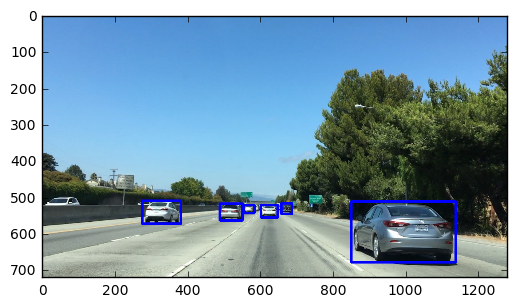

In [7]:
# Plot result
bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
plt.imshow(result)

---

## Histogram Of Color:

Histogram of pixel intensity.

In [8]:
# Read in the image
example_hist = mpimg.imread('./sample_images/cutout1.jpg')

In [9]:
# Take histograms in R, G, and B
rhist = np.histogram(example_hist[:,:,0], bins=32, range=(0, 256))
ghist = np.histogram(example_hist[:,:,1], bins=32, range=(0, 256))
bhist = np.histogram(example_hist[:,:,2], bins=32, range=(0, 256))

#np.histogram() returns tuple of 2 arrays:
# 1.rhist[1]: counts in each of the bins
print("counts in each of the bins: ",rhist[1])
# 2.rhist[0]: bins edges
print("bins edges: ",rhist[0])


counts in each of the bins:  [   0.    8.   16.   24.   32.   40.   48.   56.   64.   72.   80.   88.
   96.  104.  112.  120.  128.  136.  144.  152.  160.  168.  176.  184.
  192.  200.  208.  216.  224.  232.  240.  248.  256.]
bins edges:  [400 441 302 244 189 283 412 433 239 177 209 302 276 179 129 106 104 111
 106  96 111 123 139 130 167 164 149 156 222 268 258  53]


In [10]:
# Generating bin centers
bin_edges = rhist[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

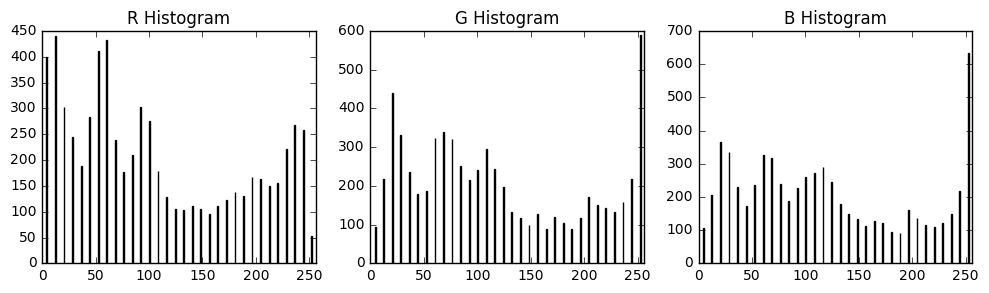

In [11]:
# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')

In [12]:
# The feature vector for this particular cutout image:
hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))

In [13]:
# Function for Color Histogram:

nbins = 32

image = example_hist

def color_hist(img, nbins):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins)
    ghist = np.histogram(img[:,:,1], bins=nbins)
    bhist = np.histogram(img[:,:,2], bins=nbins)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features

In [14]:
# Compute Values:
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32)

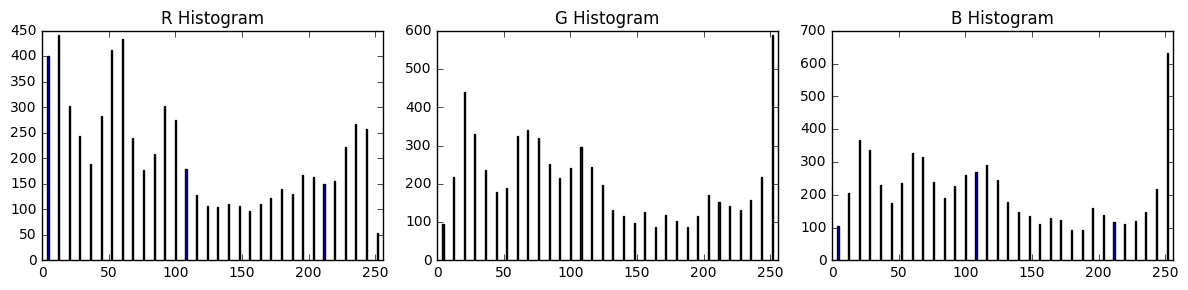

In [15]:
# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()

---

## Exploring Color Spaces:

You can study the distribution of color values in an image by plotting each pixel in some color space. Here's a code snippet that you can use to generate 3D plots:

In [16]:
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

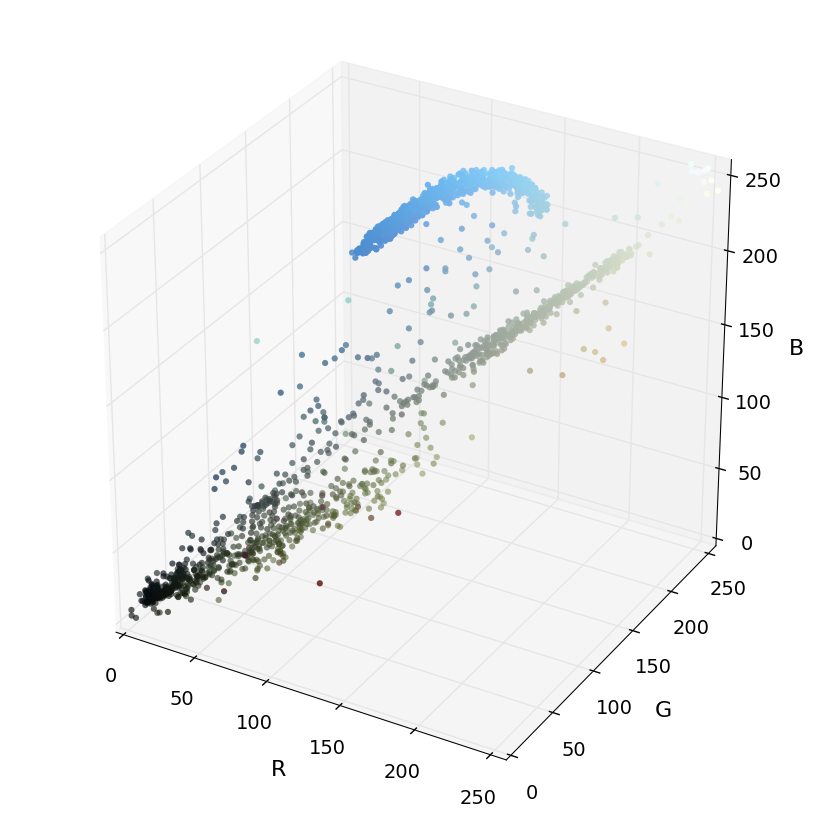

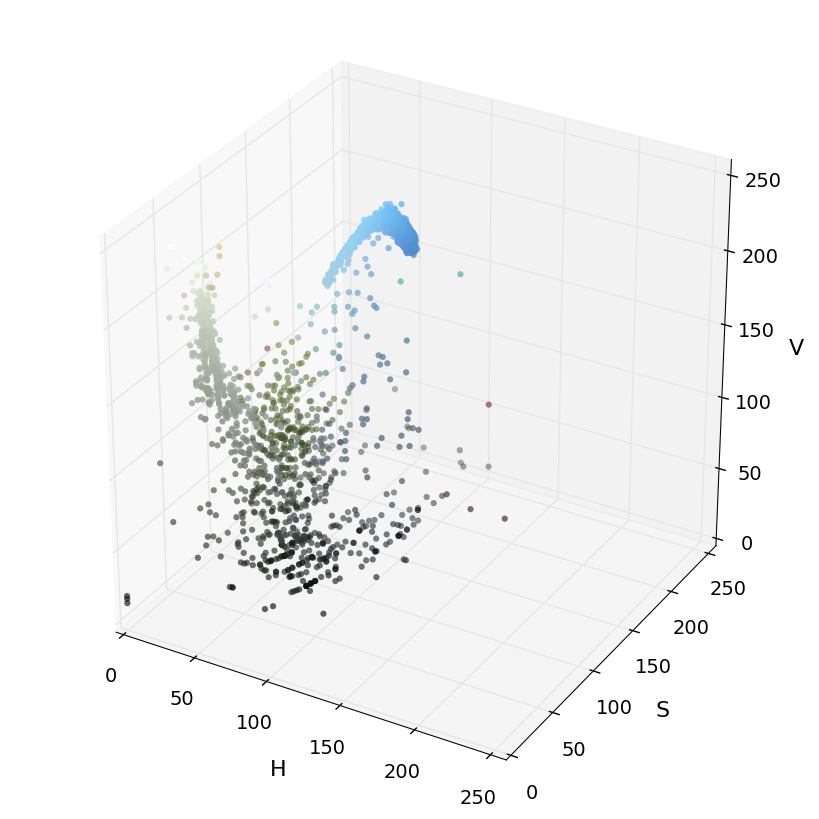

In [17]:
# Read a color image
img = cv2.imread("./sample_images/bbox-example-image.jpg")

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

---

# Spatial Binning Of Color:

Although template matching lacks when the same image appear in different dimensions, the raw pixel intensity can still be a valuable feature for object detection. 

As seen below by resizing the resolution of the image the same features are still intact thus decreasing the hassle of dealing with a full resolution 3 channel image.

The resized image dimensions:  (32, 32, 3)


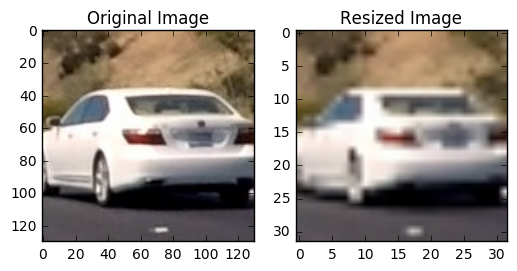

In [18]:
example_spatial_binning = mpimg.imread('./sample_images/test_img.jpg')
small_img = cv2.resize(example_spatial_binning, (32, 32))
f, (ax1, ax2) = plt.subplots(1, 2)
f.subplots_adjust(hspace = .2, wspace=.2)
ax1.imshow(example_spatial_binning)
ax1.set_title('Original Image')
ax2.imshow(small_img)
ax2.set_title('Resized Image')
print("The resized image dimensions: ",small_img.shape)

If you then wanted to convert this to a one dimensional feature vector, you could simply say something like:

In [19]:
feature_vec = small_img.ravel()
print("Shape of feature vector created: ", feature_vec.shape)


Shape of feature vector created:  (3072,)


### The goal in this exercise is to write a function that takes in an image, a color space conversion, and the resolution you would like to convert it to, and returns a feature vector.

In [20]:
# Define a function that takes an image, a color space, 
# and a new image size
# and returns a feature vector

def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features

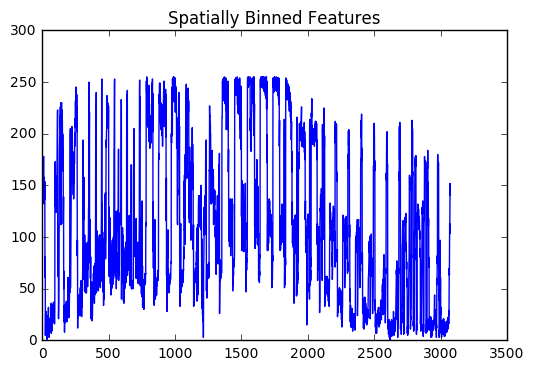

In [21]:
image_spatial = mpimg.imread('./sample_images/cutout1.jpg')

feature_vec = bin_spatial(image_spatial, color_space='RGB', size=(32, 32))

# Plot features
plt.plot(feature_vec)
plt.title('Spatially Binned Features')

---

## Gradient Features:



## HOG Feature Extraction:

### Algorithm overview:
Compute a Histogram of Oriented Gradients (HOG) by:

- (optional) global image normalisation
- computing the gradient image in x and y
- computing gradient histograms
- normalising across blocks
- flattening into a feature vector

## Data Exploration:

For the exercises throughout the rest of this lesson, we'll use a relatively small labeled dataset to try out feature extraction and training a classifier. Before we get on to extracting HOG features and training a classifier, let's explore the dataset a bit. This dataset is a subset of the data you'll be starting with for the project.

These datasets are comprised of images taken from the GTI vehicle image database, the KITTI vision benchmark suite, and examples extracted from the project video itself. In this exercise, you can explore the data to see what you're working with.

In [22]:
import glob

In [23]:
# Loading cars and notcars images from Udacity provided dataset

images_cars = glob.glob("./training_dataset_smallset/vehicles_smallset/cars1/*.jpeg") #from vehicles_smallset/cars1
print("The number of car images are:",len(images_cars))

images_notcars = glob.glob('.//training_dataset_smallset/non-vehicles_smallset/notcars1/*.jpeg')#from non-vehicles_smallset/notcars1
print("The number of non car images are:",len(images_notcars))

cars = []
notcars = []

for image in images_cars:
    cars.append(image)
    
for image in images_notcars:
    notcars.append(image)
        

The number of car images are: 397
The number of non car images are: 399


In [24]:
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict

In [25]:
data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])

Your function returned a count of 397  cars and 399  non-cars
of size:  (64, 64, 3)  and data type: uint8


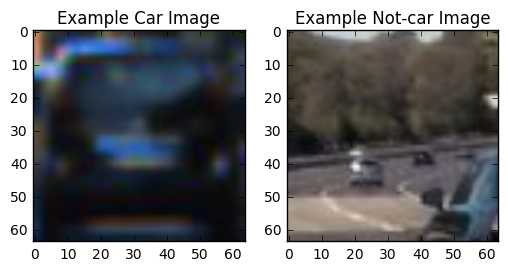

In [26]:
# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')

---

## Scikit-image HOG:

#### skimage.feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L1', visualise=False, transform_sqrt=False, feature_vector=True, normalise=None)[source]

The scikit-image hog() function takes in a single color channel or grayscaled image as input, as well as various parameters. These parameters include orientations, pixels_per_cell and cells_per_block.

The number of orientations is specified as an integer, and represents the number of orientation bins that the gradient information will be split up into in the histogram. Typical values are between 6 and 12 bins.

The pixels_per_cell parameter specifies the cell size over which each gradient histogram is computed. This paramater is passed as a 2-tuple so you could have different cell sizes in x and y, but cells are commonly chosen to be square.

The cells_per_block parameter is also passed as a 2-tuple, and specifies the local area over which the histogram counts in a given cell will be normalized. Block normalization is not necessarily required, but generally leads to a more robust feature set.

There is another optional power law or "gamma" normalization scheme set by the flag transform_sqrt. This type of normalization may help reduce the effects of shadows or other illumination variation, but will cause an error if your image contains negative values (because it's taking the square root of image values).


In [27]:
from skimage.feature import hog

In [28]:
#Test with HOG
def get_hog_features(image, cspace='RGB', orient=8, pix_per_cell=(8,8), cell_per_block=(2,2), hog_channel=0, vis=False, feat_vec=True):
    if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    else: 
        feature_image = np.copy(image)
    
    if hog_channel<3:
        img = feature_image[:,:,hog_channel]
    else:
        img = np.copy(feature_image)
    
    #print('feature_image.shape', feature_image.shape)  
    #print('img.shape',img.shape)  
    
    
    if vis == True:
        # Use skimage.hog() to get both features and a visualization
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=pix_per_cell, cells_per_block=cell_per_block, visualise=vis, transform_sqrt=False, feature_vector=feat_vec, normalise=None)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=pix_per_cell, cells_per_block=cell_per_block, visualise=vis, transform_sqrt=False, feature_vector=feat_vec, normalise=None)
        return features

In [29]:
def get_hog_interact(image, cspace, orient =8, npixpercells =8, cellsperblock = 1,hog_channel=0, vis=True, feat_vec=True):
    if vis == True:
        # Use skimage.hog() to get both features and a visualization
        features, hog_image = get_hog_features(image, cspace, orient, (npixpercells,npixpercells), (cellsperblock,cellsperblock), hog_channel, vis, feat_vec)
        #plt.imshow(hog_image)
        plt.figure(figsize=(10,10))
        plt.subplot(121)
        plt.imshow(image, cmap='gray')
        plt.title('Example Car Image')
        plt.subplot(122)
        plt.imshow(hog_image, cmap='gray')
        plt.title('HOG Visualization')
        #plt.imshow(img,cmap='gray')
        #plt.subplot(122)
        plt.imshow(hog_image, cmap = 'gray')
    else:      
        features = get_hog_features(image, cspace, orient, (pix_per_cell,pix_per_cell), (cell_per_block,cell_per_block), hog_channel, vis, feat_vec)
        #return features

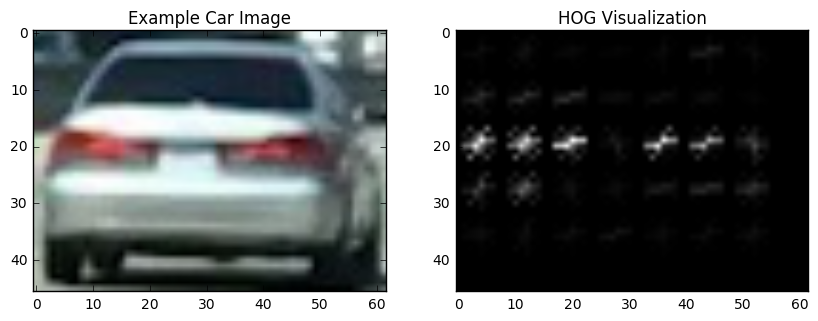

In [30]:
image = mpimg.imread('./sample_images/cutout2.jpg')

get_hog_interact(image, 'HSV', 9, 8,2,0, True, True)

---

## Interact Demonstration (from ipywidgets):

In [31]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [32]:
def f2(x1=True, x2 = 1):
    if x1:
        return x2+1
    else:
        return x2-1

interact(f2, x2=widgets.IntSlider(min=-10,max=30,step=1,value=10));
interact(f2, x2=(-1,2));

2

---

## Spatial Binning Using Interact:

In [34]:
image = mpimg.imread('./sample_images/cutout2.jpg')

<function __main__.fBIN>

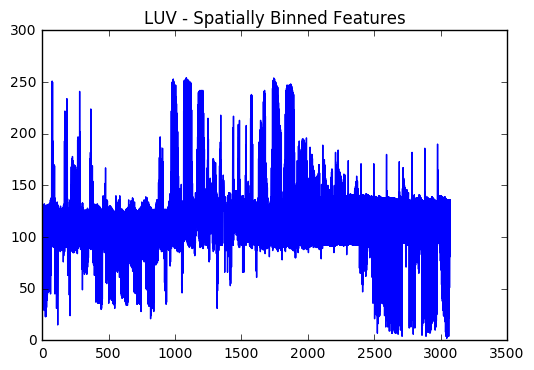

In [35]:
# Plot features
def fBIN(color_s):
    feature_vec = bin_spatial(image, color_space=color_s, size=(32, 32))
    plt.plot(feature_vec)
    plt.title(color_s + ' - Spatially Binned Features')
    

interact(fBIN, color_s={'HSV':'HSV', 'LUV':'LUV','HLS':'HLS','YUV':'YUV','YCrCb':'YCrCb'})

---

## Using Interact to plot example images:

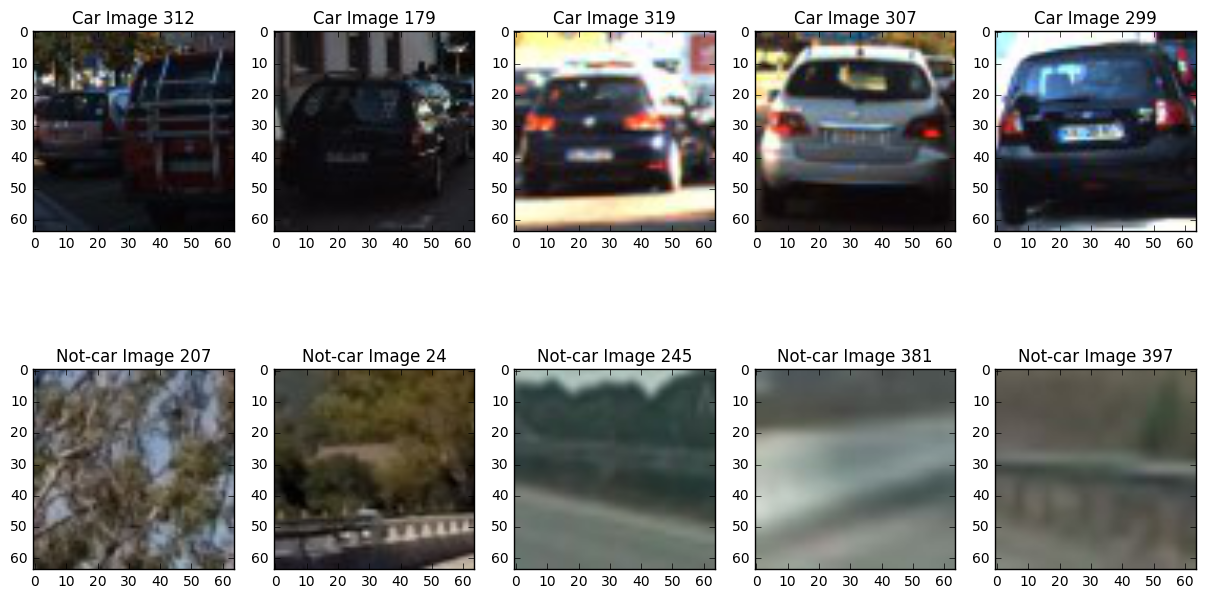

In [36]:
# Plot examples

%matplotlib inline
def plotExamples():
    plt.figure(figsize=(15,8))

    for i in range(5):
        car_ind = np.random.randint(0, len(cars))
        notcar_ind = np.random.randint(0, len(notcars))

        # Read in car / not-car images
        car_image = mpimg.imread(cars[car_ind])
        notcar_image = mpimg.imread(notcars[notcar_ind])


        plt.subplot(2,5,i+1)
        plt.imshow(car_image)
        plt.title('Car Image ' + str(car_ind))
        plt.subplot(2,5,5+i+1)
        plt.imshow(notcar_image)
        plt.title('Not-car Image ' + str(notcar_ind))

interact_manual(plotExamples)

---

## Using Interact for HOG feature extraction:

In [37]:
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))

# Read in car / not-car images
img =mpimg.imread(cars[car_ind])
#img = mpimg.imread(notcars[notcar_ind])

<function __main__.get_hog_interact>

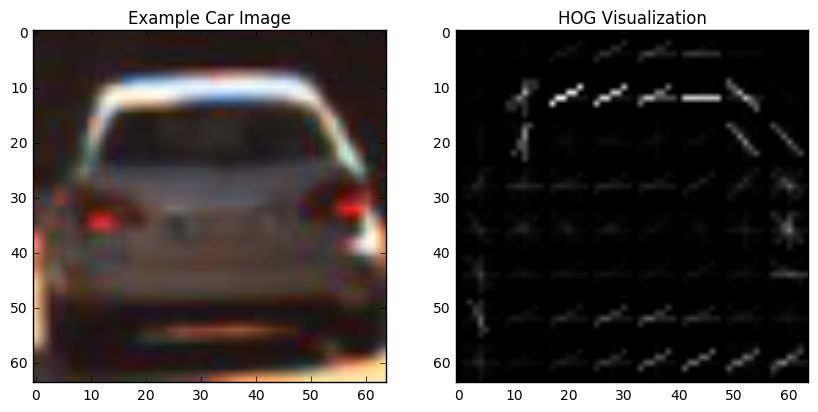

In [38]:
#img = mpimg.imread('image0038.png')

interact(get_hog_interact, image=fixed(img),cspace={'RGB':'RGB','HSV':'HSV', 'LUV':'LUV','HLS':'HLS','YUV':'YUV','YCrCb':'YCrCb'},orient=(1,16), npixpercells =(1,16), cellsperblock =(1,8),hog_channel=(0,3), vis=fixed(True), feat_vec=fixed(True))

#Final parameters
#orient = 8
#npixpercells =8
#cellsperblock =2
#HSV channel 2
